<a href="https://colab.research.google.com/github/Emir515/Self-Organizing-Systems-Assignment-1/blob/main/SelfOrganizingSystems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random

def calculate_fitness(route, data):
    total_distance = 0
    current_load = 0
    vehicle_capacity = data['vehicle_capacities'][0]
    distance_matrix = data['distance_matrix']

    for i in range(len(route)):
        if current_load + data['demands'][route[i]] > vehicle_capacity:
            # Return to depot and reset load if over capacity
            total_distance += distance_matrix[route[i-1]][data['depot']]
            current_load = 0
        current_load += data['demands'][route[i]]
        if i > 0:
            total_distance += distance_matrix[route[i-1]][route[i]]
    total_distance += distance_matrix[route[-1]][data['depot']]  # Return to depot

    return total_distance

def selection(population, data):
    fitness_scores = [(route, calculate_fitness(route, data)) for route in population]
    fitness_scores.sort(key=lambda x: x[1])
    selected = [route for route, score in fitness_scores[:len(fitness_scores) // 2]]
    return selected

# Crossover
def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 2)
    child1 = parent1[:crossover_point] + [item for item in parent2 if item not in parent1[:crossover_point]]
    child2 = parent2[:crossover_point] + [item for item in parent1 if item not in parent2[:crossover_point]]
    return child1, child2

# Mutation
def mutate(route):
    idx1, idx2 = random.sample(range(len(route)), 2)
    route[idx1], route[idx2] = route[idx2], route[idx1]
    return route

# Genetic Algorithm
def genetic_algorithm(data, pop_size=10, generations=50, mutation_rate=0.1):
    num_customers = len(data['distance_matrix']) - 1
    population = initialize_population(pop_size, num_customers)

    for gen in range(generations):
        selected = selection(population, data)
        next_generation = []

        # Crossover
        while len(next_generation) < pop_size:
            parent1, parent2 = random.sample(selected, 2)
            child1, child2 = crossover(parent1, parent2)
            next_generation.extend([child1, child2])

        # Mutation
        for i in range(len(next_generation)):
            if random.random() < mutation_rate:
                next_generation[i] = mutate(next_generation[i])

        population = next_generation

    # Select the best route from the final population
    best_route = min(population, key=lambda route: calculate_fitness(route, data))
    best_cost = calculate_fitness(best_route, data)
    return best_route, best_cost

# Main function
if __name__ == "__main__":
    data = create_data_model()
    best_route, best_cost = genetic_algorithm(data)
    print("Best Route:", best_route)
    print("Best Cost:", best_cost)


Best Route: [2, 3, 1]
Best Cost: 85


In [4]:

import numpy as np
import pandas as pd

def generate_vrp_data(num_customers, max_demand, vehicle_capacity, seed=42):
    np.random.seed(seed)
    depot = (0, 0)  # central depot at origin
    customer_locations = np.random.rand(num_customers, 2) * 100  # random locations in a 100x100 grid
    demands = np.random.randint(1, max_demand, num_customers)  # random demand per customer

    # Calculate distance matrix (Euclidean distance)
    locations = np.vstack([depot, customer_locations])
    distance_matrix = np.sqrt(((locations[:, np.newaxis] - locations) ** 2).sum(axis=2))

    # Save data to DataFrame for easy handling
    vrp_data = pd.DataFrame({
        'Location': ['Depot'] + [f'Customer_{i}' for i in range(1, num_customers + 1)],
        'X': locations[:, 0],
        'Y': locations[:, 1],
        'Demand': [0] + list(demands)
    })
    return vrp_data, distance_matrix, vehicle_capacity

# Example usage
num_customers = 100
max_demand = 10
vehicle_capacity = 120
vrp_data, distance_matrix, vehicle_capacity = generate_vrp_data(num_customers, max_demand, vehicle_capacity)
print(vrp_data)
print("Distance Matrix:\n", distance_matrix)


         Location          X          Y  Demand
0           Depot   0.000000   0.000000       0
1      Customer_1  37.454012  95.071431       8
2      Customer_2  73.199394  59.865848       4
3      Customer_3  15.601864  15.599452       1
4      Customer_4   5.808361  86.617615       8
..            ...        ...        ...     ...
96    Customer_96   9.310277  89.721576       2
97    Customer_97  90.041806  63.310146       7
98    Customer_98  33.902979  34.920957       6
99    Customer_99  72.595568  89.711026       3
100  Customer_100  88.708642  77.987555       9

[101 rows x 4 columns]
Distance Matrix:
 [[  0.         102.18307066  94.5625249  ...  48.67119541 115.40443952
  118.11554475]
 [102.18307066   0.          50.17136011 ...  60.25520108  35.54803646
   54.02680791]
 [ 94.5625249   50.17136011   0.         ...  46.54520193  29.85128524
   23.85231677]
 ...
 [ 48.67119541  60.25520108  46.54520193 ...   0.          67.07509252
   69.70217012]
 [115.40443952  35.54803646  

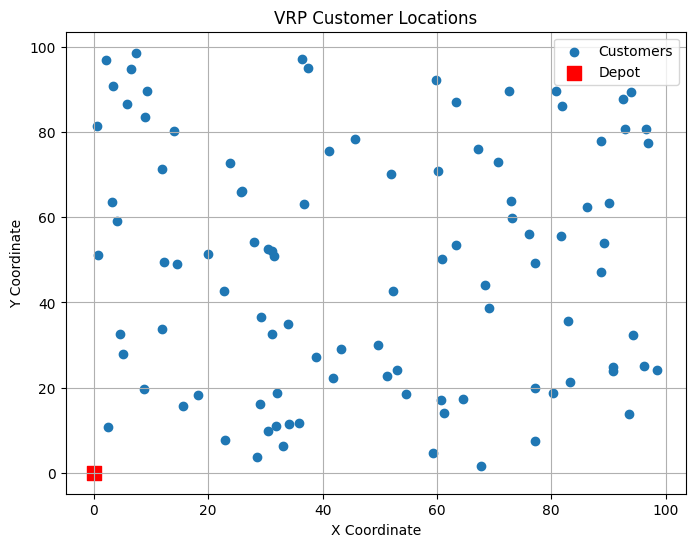

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(vrp_data['X'][1:], vrp_data['Y'][1:], marker='o', label='Customers')
plt.scatter(vrp_data['X'][0], vrp_data['Y'][0], marker='s', s=100, color='red', label='Depot')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('VRP Customer Locations')
plt.legend()
plt.grid(True)
plt.show()